# Importando as bibliotecas e plotando o gráfico original

In [1]:
import pandas as pd
!pip install seaborn==0.9.0
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

     -------------------------------------- 208.1/208.1 kB 1.2 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


**Gráfico sem valores nulos**

In [2]:
np.random.seed(6)
dados = pd.date_range('1/1/2017', periods=24, freq='M')
vendas = np.random.randint(low=20,high=25,size=24)
df = pd.DataFrame({'mes':dados, 'vendas':vendas})

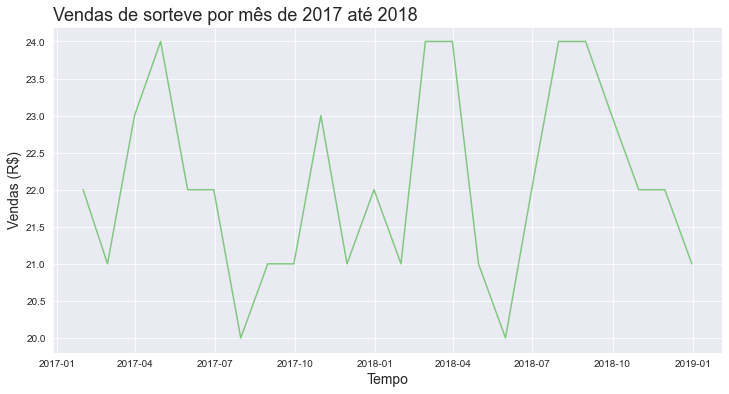

In [3]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=df)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas de sorteve por mês de 2017 até 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
plt.savefig('vendas_constantes.png')
ax = ax

# Removendo o valor da venda das vendas 23

In [4]:
df.loc[df.vendas == 23,['vendas']] = np.nan

In [5]:
df.head()

,mes,vendas
0,2017-01-31,22.0
1,2017-02-28,21.0
2,2017-03-31,NaN
3,2017-04-30,24.0
4,2017-05-31,22.0


In [6]:
df['vendas'].isna().sum().sum()

3

**Ao tentar plotar, um erro será exibido informando que não temos tipos numéricos para agregar**

In [7]:
'''
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=df)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas de sorteve por mês de 2017 até 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
plt.savefig('vendas_constantes.png')
ax = ax
'''

"\nsns.set_palette('Accent')\nsns.set_style('darkgrid')\nax = sns.lineplot(x='mes', y='vendas', data=df)\nax.figure.set_size_inches(12,6)\nax.set_title('Vendas de sorteve por mês de 2017 até 2018', loc='left', fontsize=18)\nax.set_xlabel('Tempo', fontsize=14)\nax.set_ylabel('Vendas (R$)', fontsize=14)\nplt.savefig('vendas_constantes.png')\nax = ax\n"

# Solução 1 - Preenchendo dados nulos com valor médio das vendas

In [8]:
df.fillna(df['vendas'].mean(),inplace=True)
df['vendas'] = df['vendas'].round()
df.tail(8)

,mes,vendas
16,2018-05-31,20.0
17,2018-06-30,22.0
18,2018-07-31,24.0
19,2018-08-31,24.0
20,2018-09-30,22.0
21,2018-10-31,22.0
22,2018-11-30,22.0
23,2018-12-31,21.0


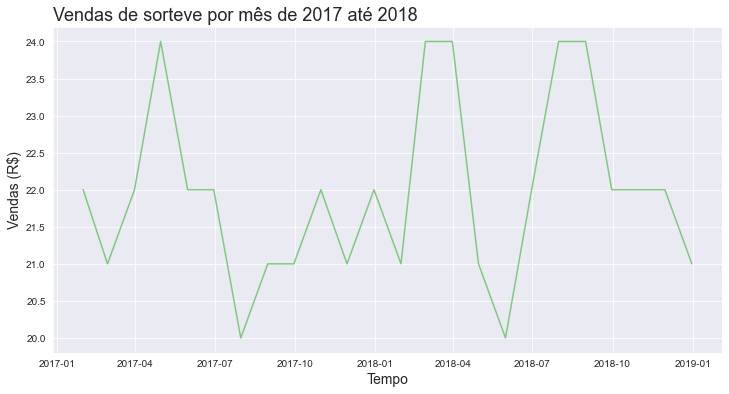

In [9]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=df)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas de sorteve por mês de 2017 até 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
plt.savefig('vendas_constantes.png')
ax = ax

# Solução 2 - Preenchendo com um valor específico

In [10]:
np.random.seed(6)
dados = pd.date_range('1/1/2017', periods=24, freq='M')
vendas = np.random.randint(low=20,high=25,size=24)
df = pd.DataFrame({'mes':dados, 'vendas':vendas})
df.loc[df.vendas == 23,['vendas']] = np.nan

In [11]:
df.isna().sum().sum()

3

**Preenchendo com o valor 21**

In [12]:
df.fillna(21,inplace=True)

In [13]:
df.isna().sum().sum()

0

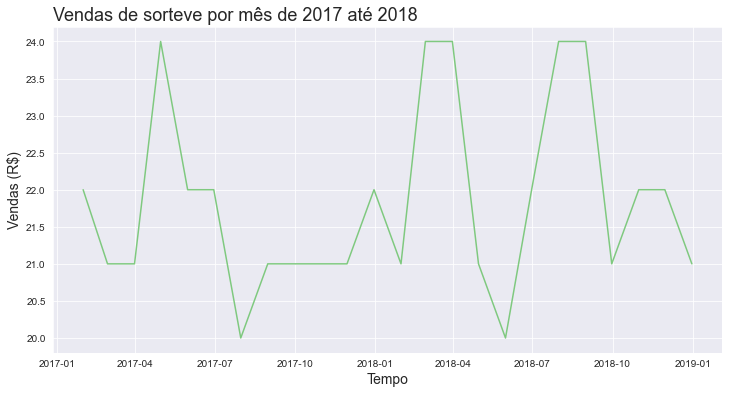

In [14]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=df)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas de sorteve por mês de 2017 até 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
plt.savefig('vendas_constantes.png')
ax = ax

# Solução 3 - Removendo dados nulos do DataFrame

In [15]:
df.isna().sum().sum()

0

In [16]:
df.dropna(inplace=True)

In [17]:
df.isna().sum().sum()

0

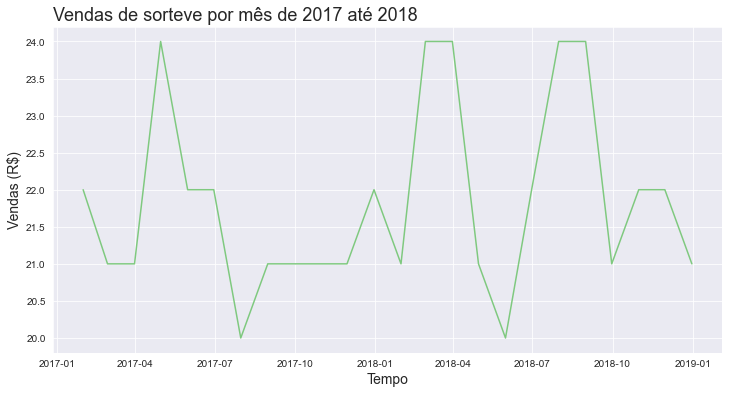

In [18]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=df)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas de sorteve por mês de 2017 até 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
plt.savefig('vendas_constantes.png')
ax = ax

# Solução 4 - Preenchendo com o valor anterior ou posteior

In [19]:
np.random.seed(6)
dados = pd.date_range('1/1/2017', periods=24, freq='M')
vendas = np.random.randint(low=20,high=25,size=24)
df = pd.DataFrame({'mes':dados, 'vendas':vendas})
df.loc[df.vendas == 23,['vendas']] = np.nan

**ffill() - Anterior**

In [20]:
df.head()

,mes,vendas
0,2017-01-31,22.0
1,2017-02-28,21.0
2,2017-03-31,NaN
3,2017-04-30,24.0
4,2017-05-31,22.0


In [21]:
df.ffill().head()

,mes,vendas
0,2017-01-31,22.0
1,2017-02-28,21.0
2,2017-03-31,21.0
3,2017-04-30,24.0
4,2017-05-31,22.0


**bfill - posteior**

In [22]:
df.bfill().head()

,mes,vendas
0,2017-01-31,22.0
1,2017-02-28,21.0
2,2017-03-31,24.0
3,2017-04-30,24.0
4,2017-05-31,22.0


# Solução 5 - Interpolando dados nulos com um com o valor médio 

In [23]:
np.random.seed(6)
dados = pd.date_range('1/1/2017', periods=24, freq='M')
vendas = np.random.randint(low=20,high=25,size=24)
df = pd.DataFrame({'mes':dados, 'vendas':vendas})
df.loc[df.vendas == 23,['vendas']] = np.nan

In [24]:
df.head()

,mes,vendas
0,2017-01-31,22.0
1,2017-02-28,21.0
2,2017-03-31,NaN
3,2017-04-30,24.0
4,2017-05-31,22.0


In [26]:
df.interpolate().head()

ValueError: Invalid fill method. Expecting pad (ffill) or backfill (bfill). Got linear